![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)

<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Foundations of Artificial Intelligence<br> (AI701-Fall2022) </span><h1>

<h2><span style="color:green"> Lab-02 </span><h2> Introduction to Linear Models
</div>

---
---

# Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. Unlike trying to classify them into categories like cat, dog etc, it is used for predicting the values within a continuous range for e.g. sales, price.

In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how linear models can be generalized to account for more complicated patterns in data.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 4 and an intercept of -6:

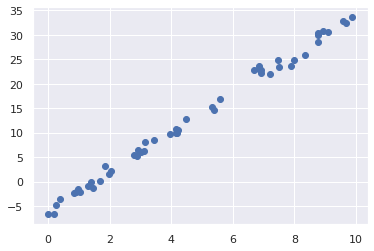

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 4 * x - 6 + rng.randn(50)
plt.scatter(x, y);

In [ ]:
print(x.shape)
x

(50,)


array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])

In [ ]:
print(y.shape)
y

(50,)


array([ 9.99370749, 21.9677741 , -6.66667114,  6.08063831, -1.24707472,
       -2.07204051,  3.11021063,  8.56447324,  9.67886342, 14.6650404 ,
       10.02062228, 23.10123462,  2.22889774, 28.48770181, -4.71358079,
       22.91895554, 10.81235105, 16.96479625, -0.08435214,  1.57180972,
       24.88726455, 32.38112031,  6.32807289, 22.27952782, 29.89454951,
       30.71536862, -2.31264422, -3.55266751,  0.03881884, 30.37856829,
       -1.55319683, 10.54621217, 32.80409935, 15.25103969, 22.80671395,
        8.14044206, 23.64561251, 25.98853054, -6.71258271, 23.50130673,
       33.71448063, 24.8027951 ,  5.53339463, 23.54897192, -2.17716375,
       12.74371569, 30.57391486,  6.50657712,  5.2886854 , -0.99961518])

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

In [ ]:
x.shape , x[:, np.newaxis].shape

((50,), (50, 1))

In [ ]:
x[:, np.newaxis]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00],
       [9.23385948e-01],
       [1.86260211e+00],
       [3.45560727e+00],
       [3.96767474e+00],
       [5.38816734e+00],
       [4.19194514e+00],
       [6.85219500e+00],
       [2.04452250e+00],
       [8.78117436e+00],
       [2.73875932e-01],
       [6.70467510e+00],
       [4.17304802e+00],
       [5.58689828e+00],
       [1.40386939e+00],
       [1.98101489e+00],
       [8.00744569e+00],
       [9.68261576e+00],
       [3.13424178e+00],
       [6.92322616e+00],
       [8.76389152e+00],
       [8.94606664e+00],
       [8.50442114e-01],
       [3.90547832e-01],
       [1.69830420e+00],
       [8.78142503e+00],
       [9.83468338e-01],
       [4.21107625e+00],
       [9.57889530e+00],
       [5.33165285e+00],
       [6.91877114e+00],
       [3.15515631e+00],
       [6.86500928e+00],
       [8.34625672e+00],
       [1.82882773e-01],
       [7.50144315e+00],


In [ ]:
np.linspace(0, 20, 9)

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ])

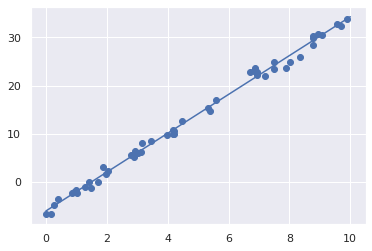

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     4.027208810360695
Model intercept: -5.998577085553199


We see that the results are very close to the inputs, as we might hope.

## Use Case: Price Prediction

Here we are taking the example of Boston housing dataset. It is directly downloaded using scikit learn data sets library. It consist of price of houses of different places in Boston. Here in this dataset 506 rows and 13 columns. Our task is to predict the price of house.
Data set details :

CRIM per capita crime rate by town

1. N proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS proportion of non-retail business acres per town
3. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. NOX nitric oxides concentration (parts per 10 million)
5. RM average number of rooms per dwelling
6. AGE proportion of owner-occupied units built prior to 1940
7. DIS weighted distances to five Boston employment centres
8. RAD index of accessibility to radial highways
9. TAX full-value property-tax rate per 10,000usd
10. PTRATIO pupil-teacher ratio by town
11. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT % lower status of the population



Each record in the database describes a Boston suburb or town.

First step is to import necessary libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Now we want to load our Boston dataset from scikit-learn library.

In [ ]:
from sklearn.datasets import load_boston 
boston = load_boston() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

We use ".keys()" to display several keys that we can use :  

In [ ]:
print(boston.keys())  

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


For finding the shape of our dataset :

In [ ]:
boston.target.shape

(506,)

In [ ]:
boston.data.shape

(506, 13)

It means 506 rows and 13 columns.

For getting the feature names :

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Now our dataset is an nd-array. For converting it into dataframe, we use "pd. DataFrame", and we add feature names to it :

In [ ]:
data_set = pd.DataFrame(boston.data) 
data_set.columns = boston.feature_names


For adding price coloumn to our data :

In [ ]:
data_set['Price'] = boston.target  
data_set.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Get input and output data. Now we have to split our dataset into testing and training parts:

In [ ]:
x = boston.data
y = boston.target


from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2,random_state = 0) 
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)


x_train shape :  (404, 13)
x_test shape :  (102, 13)
y_train shape :  (404,)
y_test shape :  (102,)


This is the main step in linear regression. Here we fit our training data into the linear regression model :

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
linear_regression = LinearRegression() 
linear_regression.fit(x_train, y_train) 

LinearRegression()

This is the prediction part :

In [ ]:
y_prediction =  linear_regression.predict(x_test)

In [ ]:
y_prediction

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

In [ ]:
print(y_prediction.shape, y_test.shape)

(102,) (102,)


Plotting the results:

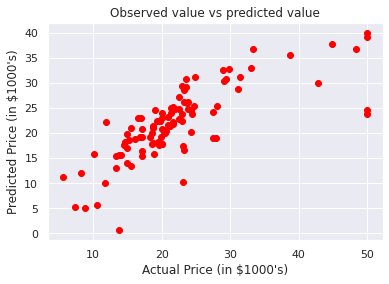

In [ ]:
plt.scatter(y_test, y_prediction, c = 'red') 
plt.xlabel("Actual Price (in $1000's)") 
plt.ylabel("Predicted Price (in $1000's)") 
plt.title("Observed value vs predicted value") 
plt.show()

We can calculate the Mean squared error.

In [ ]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, y_prediction) 
print("Mean Square Error : ", MSE)

Mean Square Error :  33.448979997676496


---
---

The ``LinearRegression`` estimator is much more capable than this—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$ y = a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_n x_n$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
X.shape

(100, 3)

In [ ]:
a = [1.5, -2., 1.]

In [ ]:
y = 0.5 + np.dot(X, a)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000056
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
The idea is to take our multidimensional linear model:
$$ y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots + a_n x_n$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$ y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_n x^n$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial Basis Functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:


https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [ ]:
poly = PolynomialFeatures(3)
poly.fit_transform(x[:, None])

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.

As we saw in the previous labs, the cleanest way to accomplish this is to use a pipeline.
Let's make a 7th-degree polynomial model in this way:

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

In [ ]:
x = 10 * rng.rand(50)
x.shape

(50,)

In [ ]:
poly = PolynomialFeatures(7)
p = poly.fit_transform(x[:, None])
p.shape

(50, 8)

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

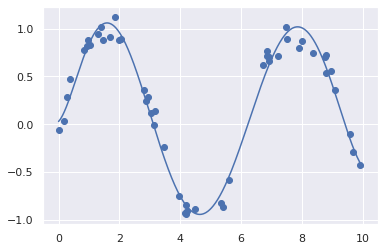

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### Gaussian Basis Functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:
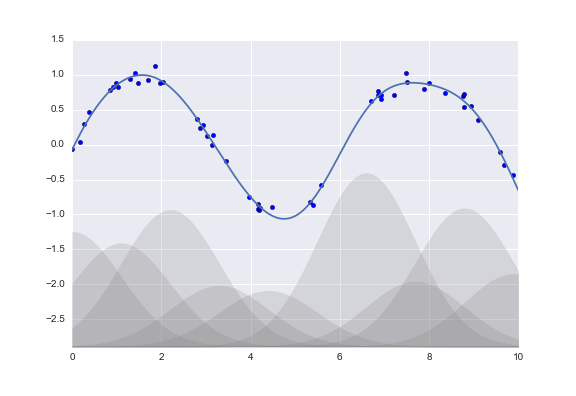

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

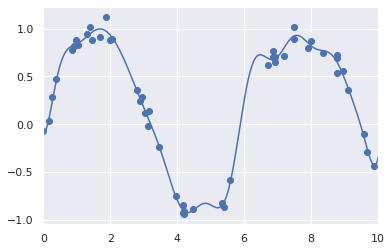

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.



---

---






# Logistic Regression

Logistic regression is a supervised classification algorithm in machine learning, although the name suggests regression. Logistic sigmoid function is used to convert the output to return a probability value.

Logistic regression can be used to solve both binary classification problems, and multi-class classification problems. It is a special case of linear regression where the target variable is categorical (non-cantinuous) in nature. A binary logistic regression results in a binary outcome , i.e. the output class consist of only two categories.

As we saw above, the Linear Regression Equation is given by:
$$ y = a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_n x_n $$

Here, y is dependent variable and $x_1, x_2 \textbf{ ... } \text{and} \ x_n$ are explanatory (input) variables.


**Sigmoid Function:**
The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, output predicted will become 1, and if the curve goes to negative infinity, output predicted will become 0. If the output of the sigmoid function is more than 0.5,  we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.
The Sigmoid Function is given by:
$$
p = \frac{1}{1+e^{-y}}
$$

![sigmoid function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/500px-Logistic-curve.svg.png)



Applying Sigmoid on linear regression, we obtain the expression for logistic regression classifier:
$$ 
p = \frac{1}{1+e^{-(a_0 + a_1 x_1 + a_2 x_2+ \text{.....} + a_n x_n)}}
$$


## Diabetes Prediction Model (Logistic Regression Classifier)

Let's build the diabetes prediction model using Scikit-learn.

Here, you are going to predict diabetes using Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. You can download data from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

#### Loading Data
We will be directly loading the dataset in this notebook.

In [ ]:
import pandas
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", header=1,  names=col_names)

In [ ]:
pima.head()      # Preview the first 5 lines of the loaded data 

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or output variable) and independent variable (or input variables also called features).


In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

#### Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`.


In [ ]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,1,0,26.6,31,85,66,0.351
1,8,0,23.3,32,183,64,0.672
2,1,94,28.1,21,89,66,0.167
3,0,168,43.1,33,137,40,2.288
4,5,0,25.6,30,116,74,0.201


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

# get predictions for the test data points
y_pred = logreg.predict(X_test)

### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  13],
       [ 26,  35]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.  

#### Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.


In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

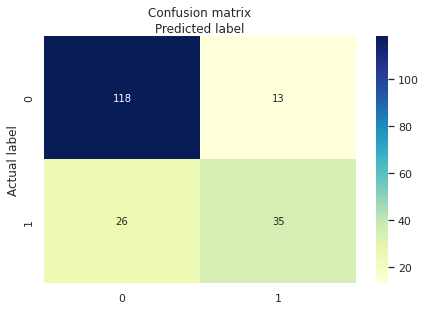

In [ ]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics

Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.796875
Precision: 0.7291666666666666
Recall: 0.5737704918032787


Well, you got a classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

#### ROC Curve

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.


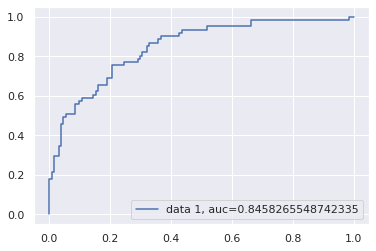

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.



# Task:

Build a linear regressor for diabetes prediction on the [Sklearn diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Use the `load_diabetes` function from sklearn datasets to load the dataset:

`datasets.load_diabetes(return_X_y=True)`

Steps to follow:

1) Load the data and targets.

2) Create training and test splits.

3) Initialise a `Linear Regressor` from sklearn.

4) Fit your model on the training data.

5) Make predictions on your test data.

6) Evaluate uour model and report your MSE and r2 score. 

7) Plot a graph comparing your predictions from your model with the target predictions (ground truths). 